In [4]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Get Images

In [2]:
import os
import shutil
import requests    

if os.path.exists("compressed_images_cuda"):
    print(f"Removing existing folder '{"compressed_images_cuda"}'…")
    shutil.rmtree("compressed_images_cuda")

os.makedirs("compressed_images_cuda", exist_ok=True)
print(f"Created folder '{"compressed_images_cuda"}'")

if os.path.exists("compressed_images_serial"):
    print(f"Removing existing folder '{"compressed_images_serial"}'…")
    shutil.rmtree("compressed_images_serial")

os.makedirs("compressed_images_serial", exist_ok=True)
print(f"Created folder '{"compressed_images_serial"}'")


if os.path.exists("cuda_results.csv"):
    os.remove("cuda_results.csv")
    print(f"Deleted {"cuda_results.csv"}")

if os.path.exists("serial_results.csv"):
    os.remove("serial_results.csv")
    print(f"Deleted {"serial_results.csv"}")

Removing existing folder 'compressed_images_cuda'…
Created folder 'compressed_images_cuda'
Removing existing folder 'compressed_images_serial'…
Created folder 'compressed_images_serial'
Deleted cuda_results.csv
Deleted serial_results.csv


In [3]:
import os
import shutil
import requests

# ─── Configuration ─────────────────────────────────────────────────────────────
GITHUB_OWNER   = 'DeveloperClyde246'         # e.g. 'octocat'
GITHUB_REPO    = 'Image-Compression-Using-DCT'             # e.g. 'my-images-repo'
GITHUB_BRANCH  = 'master'                  # e.g. 'main' or 'master'
GITHUB_PATH    = 'input_folder'        # e.g. 'assets/pics'
LOCAL_DIR      = 'images'                # Local folder name
GITHUB_TOKEN   = None                    # Or 'ghp_…' to increase rate limits

IMAGE_EXTS = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')

def download_images():
    # Step 1: Remove existing folder if present
    if os.path.exists(LOCAL_DIR):
        print(f"Removing existing folder '{LOCAL_DIR}'…")
        shutil.rmtree(LOCAL_DIR)

    # Step 2: Recreate local folder
    os.makedirs(LOCAL_DIR, exist_ok=True)
    print(f"Created folder '{LOCAL_DIR}'")

    # Step 3: Fetch directory listing from GitHub
    api_url = (
        f"https://api.github.com/repos/{GITHUB_OWNER}/{GITHUB_REPO}"
        f"/contents/{GITHUB_PATH}?ref={GITHUB_BRANCH}"
    )
    headers = {}
    if GITHUB_TOKEN:
        headers['Authorization'] = f"token {GITHUB_TOKEN}"

    resp = requests.get(api_url, headers=headers)
    resp.raise_for_status()
    items = resp.json()

    # Step 4: Download each image
    for entry in items:
        if entry.get('type') == 'file' and entry['name'].lower().endswith(IMAGE_EXTS):
            print(f"Downloading {entry['name']}…")
            img_data = requests.get(entry['download_url'], headers=headers).content
            with open(os.path.join(LOCAL_DIR, entry['name']), 'wb') as f:
                f.write(img_data)

    print("Done. All images saved in the 'images' folder.")


if __name__ == "__main__":
    download_images()

Removing existing folder 'images'…
Created folder 'images'
Done. All images saved in the 'images' folder.


# Plot Graph

In [5]:
%pip install pandas
%pip install matplotlib

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ------------- -------------------------- 3.9/11.5 MB 22.5 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.5 MB 17.6 MB/s eta 0:00:01
   ------------------------ --------------- 7.1/11.5 MB 11.3 MB/s eta 0:00:01
   ------------------------------- -------- 8.9/11.5 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.5 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 10.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ----------- ---------------------------- 3.7/12.6 MB 18.0 MB/s eta 0:00:01
   ------------------------- -------------- 8.1/12.6 MB 19.9 MB/s eta 0:00:01
   -------------------------------------- - 12.3/12.6 MB 20.3 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 19.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------ --------------------- 3.7/8.1 MB 18.1 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 18.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 17.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 17.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 23.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


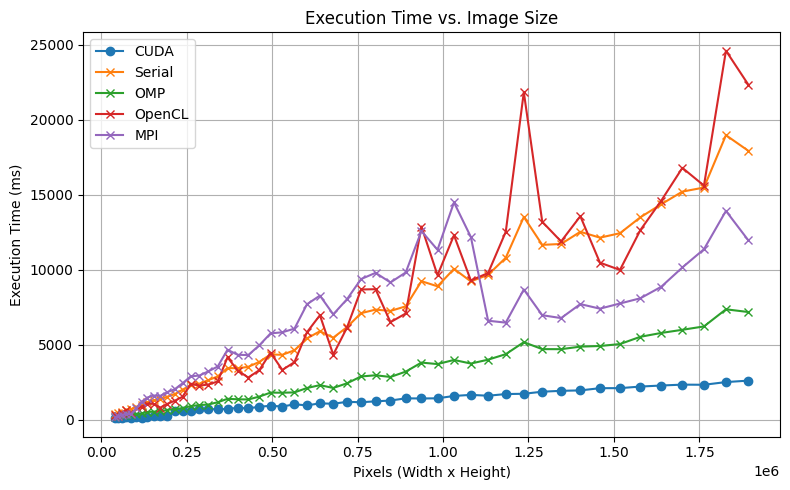

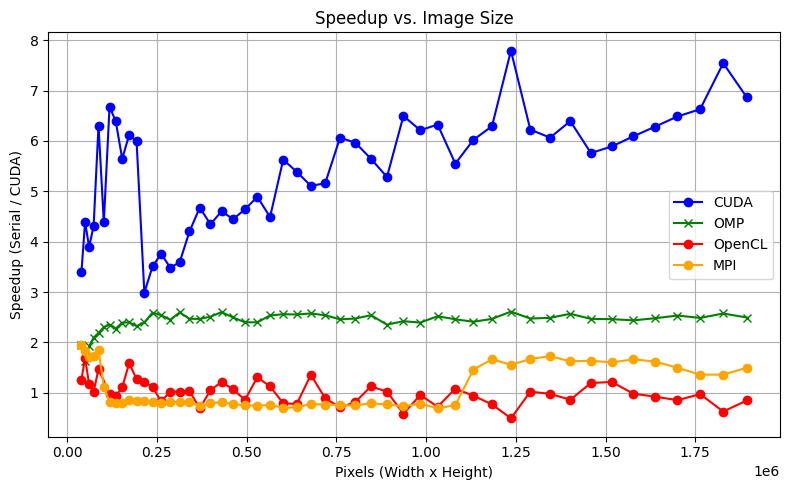

In [4]:
import csv
import matplotlib.pyplot as plt

def load_data(path):
    """
    Load Pixels and Time_ms columns from a CSV into two lists.
    Assumes the CSV has headers 'Pixels' and 'Time_ms'.
    """
    pixels = []
    times = []
    with open(path, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            pixels.append(int(row['Pixels']))
            times.append(float(row['Time_ms']))
    return pixels, times

# 1) Load data
cuda_pixels, cuda_times     = load_data('cuda_results.csv')
serial_pixels, serial_times = load_data('serial_results.csv')
omp_pixels, omp_times = load_data("omp_results.csv")
opencl_pixels, opencl_times = load_data("opencl_results.csv")
mpi_pixels, mpi_times = load_data("mpi_results.csv")

# 2) Plot Execution Time vs Image Size
plt.figure(figsize=(8,5))
plt.plot(cuda_pixels, cuda_times,   marker='o', label='CUDA')
plt.plot(serial_pixels, serial_times, marker='x', label='Serial')
plt.plot(omp_pixels, omp_times, marker='x', label='OMP')
plt.plot(opencl_pixels, opencl_times, marker='x', label='OpenCL')
plt.plot(mpi_pixels, mpi_times, marker='x', label='MPI')
plt.xlabel('Pixels (Width x Height)')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time vs. Image Size')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3) Compute and Plot Speedup = serial_time / cuda_time
#    Assumes both lists are sorted in the same order of pixel counts
cuda_speedup = [s / c for s, c in zip(serial_times, cuda_times)]
omp_speedup = [s / c for s, c in zip(serial_times, omp_times)]
opencl_speedup = [s / c for s, c in zip(serial_times, opencl_times)]
mpi_speedup = [s / c for s, c in zip(serial_times, mpi_times)]

plt.figure(figsize=(8,5))
plt.plot(cuda_pixels, cuda_speedup, marker='o', color='blue', label='CUDA')
plt.plot(omp_pixels, omp_speedup, marker='x', color='green', label='OMP')
plt.plot(opencl_pixels, opencl_speedup, marker='o', color='red', label='OpenCL')
plt.plot(mpi_pixels, mpi_speedup, marker='o', color='orange', label='MPI')
plt.xlabel('Pixels (Width x Height)')
plt.ylabel('Speedup (Serial / CUDA)')
plt.title('Speedup vs. Image Size')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
